In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("C:/Users/ASUS/Desktop/PROJECT/datasets/dia.csv")
data
data.shape

(1536, 9)

In [3]:
print("No of rows:",data.shape[0])
print("No of columns:",data.shape[1])

No of rows: 1536
No of columns: 9


In [4]:
data.info()
data.isnull().sum()
data_copy=data.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1536 non-null   int64  
 1   Glucose                   1536 non-null   int64  
 2   BloodPressure             1536 non-null   int64  
 3   SkinThickness             1536 non-null   int64  
 4   Insulin                   1536 non-null   int64  
 5   BMI                       1536 non-null   float64
 6   DiabetesPedigreeFunction  1536 non-null   float64
 7   Age                       1536 non-null   int64  
 8   Outcome                   1536 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.1 KB


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

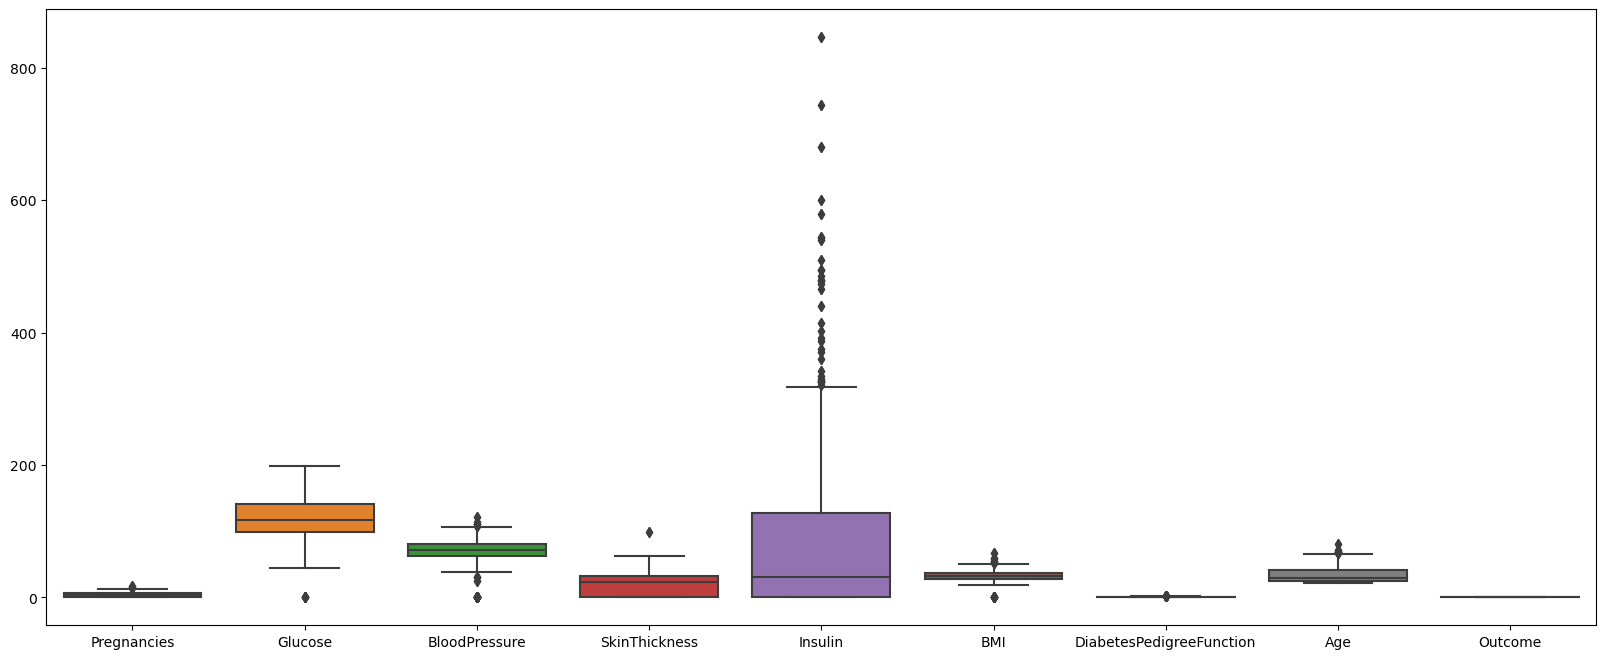

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data)
plt.show()

In [7]:
data_copy[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=data_copy[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [8]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                      10
BloodPressure                70
SkinThickness               454
Insulin                     748
BMI                          22
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

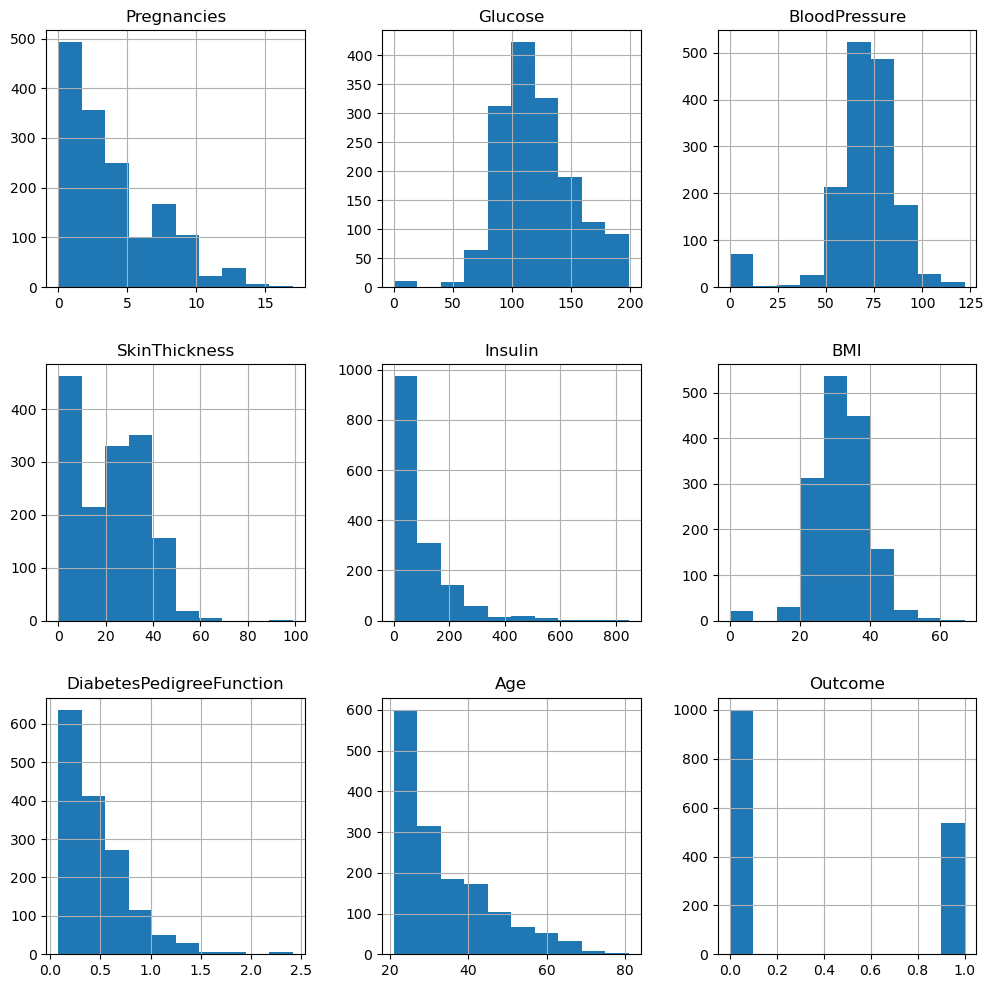

In [9]:
p = data.hist(figsize = (12,12))

In [10]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [11]:
X=data.drop('Outcome',axis=1)
Y=data['Outcome'].values

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
1531,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
1532,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
1533,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
1534,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [13]:
Y

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

In [15]:
scaler=MinMaxScaler()
scaler.fit(X_train)

scaler.data_max_

array([ 17.  , 199.  , 122.  ,  99.  , 846.  ,  67.1 ,   2.42,  81.  ])

In [16]:
scaler.data_min_

array([ 0.   , 44.   , 24.   ,  7.   , 14.   , 18.2  ,  0.078, 21.   ])

In [17]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [18]:
###### USING SUPPORT VECTOR MACHINE

In [19]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [20]:
from sklearn import svm
SVM1 =svm.SVC(kernel='linear')

In [21]:
SVM1.fit(X_train,Y_train)
SVM1.fit(X_test,Y_test)

SVC(kernel='linear')

In [22]:
y_pred1 = SVM1.predict(X_test)

In [23]:
y_pred1

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [24]:
X_test_scaled

array([[0.11764706, 0.25806452, 0.46025989, ..., 0.28205681, 0.09649872,
        0.        ],
       [0.11764706, 0.47741935, 0.57142857, ..., 0.50511247, 0.26259607,
        0.        ],
       [0.        , 0.37419355, 0.28571429, ..., 0.14110429, 0.        ,
        0.        ],
       ...,
       [0.35294118, 0.23225806, 0.57142857, ..., 0.44171779, 0.04227156,
        0.11666667],
       [0.47058824, 0.43870968, 0.48979592, ..., 0.11042945, 0.32536294,
        0.61666667],
       [0.23529412, 0.30967742, 0.57142857, ..., 0.49079755, 0.06789069,
        0.13333333]])

In [25]:
X_train_prediction=SVM1.predict(X_train)
training_data_accuracy1=accuracy_score(X_train_prediction,Y_train)

In [26]:
print("ACCURACY OF Training IS : ",round(training_data_accuracy1*100,2),"%")

ACCURACY OF Training IS :  76.99 %


In [27]:
X_test_pred=SVM1.predict(X_test)
test_data_accuracy1=(accuracy_score(X_test_pred,Y_test))

In [28]:
print("ACCURACY OF Testing IS : ",round(test_data_accuracy1*100,2),"%")

ACCURACY OF Testing IS :  81.82 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


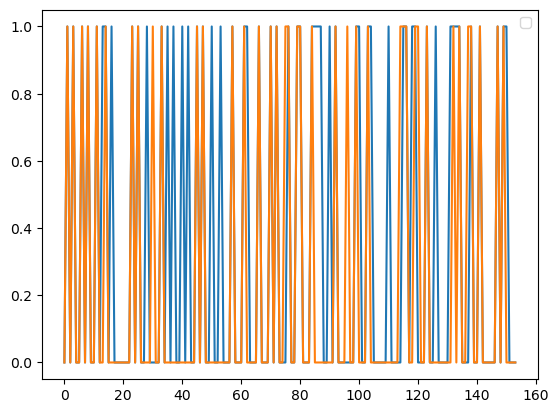

In [29]:
fig, ax = plt.subplots()
ax.plot(Y_test)
ax.plot(y_pred1)
ax.legend()

In [30]:
SVM1 = svm.SVC()
SVM1.fit(X_train,Y_train)
y_pred=SVM1.predict(X_test)

In [31]:
cm=confusion_matrix(X_test_pred,Y_test)
print(cm)

[[93 22]
 [ 6 33]]


In [32]:
tn,fp,fn,tp=cm.ravel()
print(tn,fp,fn,tp)

93 22 6 33


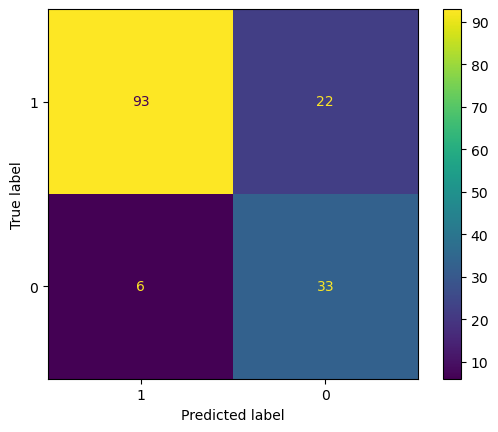

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['1','0'])
cm_disp.plot()

In [34]:
print(classification_report(X_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       115
           1       0.60      0.85      0.70        39

    accuracy                           0.82       154
   macro avg       0.77      0.83      0.79       154
weighted avg       0.85      0.82      0.83       154



In [35]:
####### USING RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,random_state=0,criterion='gini',max_depth=3)

In [37]:
rf.fit(X_train,Y_train)
y_pred2 = rf.predict(X_test)
X_train_prediction=rf.predict(X_train)

rf_accuracy_Test = rf.score(X_test, Y_test)
rf_accuracy_Train = rf.score(X_train, Y_train)



In [38]:
print("ACCURACY OF Training IS : ",round(rf_accuracy_Train*100,2),"%")

ACCURACY OF Training IS :  79.59 %


In [39]:
print("ACCURACY OF Testing IS : ",round(rf_accuracy_Test*100,2),"%")

ACCURACY OF Testing IS :  79.22 %


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm=confusion_matrix(y_pred2,Y_test)
print(cm)

[[93 26]
 [ 6 29]]


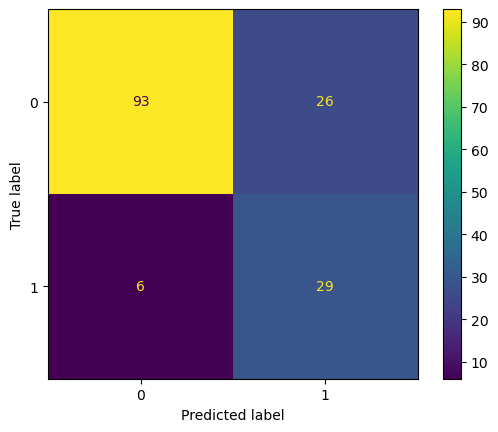

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
cm_disp.plot()

In [43]:
print(classification_report(y_pred2,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       119
           1       0.53      0.83      0.64        35

    accuracy                           0.79       154
   macro avg       0.73      0.81      0.75       154
weighted avg       0.85      0.79      0.81       154



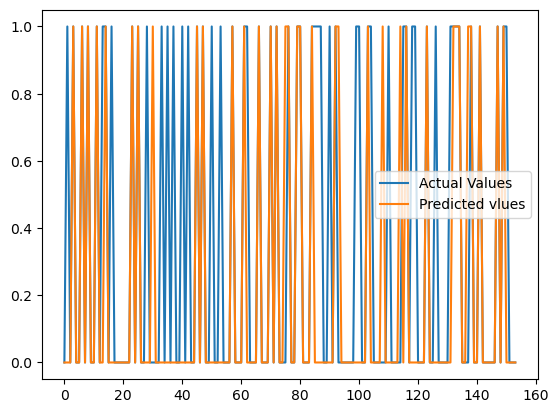

In [44]:
fig, ax = plt.subplots()
ax.plot(Y_test, label='Actual Values')
ax.plot(y_pred2, label='Predicted vlues')
ax.legend()

In [45]:
##### USING LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [47]:
model.fit(X_train,Y_train)
model.fit(X_test,Y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression()

In [48]:
X_train_prediction=model.predict(X_train)
training_data_accuracy3=accuracy_score(X_train_prediction,Y_train)

In [49]:
print("Accuracy=",round(training_data_accuracy3*100,2),"%")

Accuracy= 75.9 %


In [50]:
Y_pred3=model.predict(X_test)

In [51]:
X_test_prediction=model.predict(X_test)
test_data_accuracy3=accuracy_score(X_test_prediction,Y_test)

In [52]:
print("Accuracy=",round(test_data_accuracy3*100,2),"%")

Accuracy= 81.17 %


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm=confusion_matrix(X_test_prediction,Y_test)
print(cm)

[[91 21]
 [ 8 34]]


In [55]:
tn,fp,tp,fn=cm.ravel()
print(tn,fp,tp,fn)

91 21 8 34


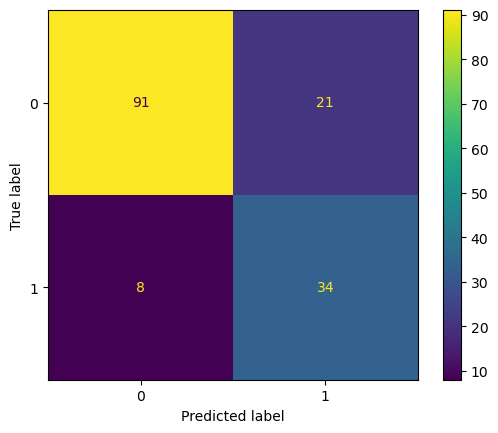

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
cm_disp.plot()

In [57]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       112
           1       0.62      0.81      0.70        42

    accuracy                           0.81       154
   macro avg       0.77      0.81      0.78       154
weighted avg       0.84      0.81      0.82       154



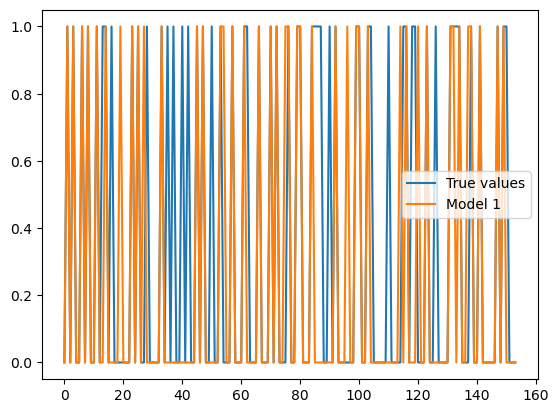

In [58]:
fig, ax = plt.subplots()
ax.plot(Y_test, label='True values')
ax.plot(Y_pred3, label='Model 1')
ax.legend()

In [59]:
##### FINAL EVALUATION

In [60]:
FINAL_DATA=pd.DataFrame({'Model':['SVM','RF','LR'],
                        "ACC_TRAIN":[round(training_data_accuracy1*100,2),
                                    round(rf_accuracy_Train*100,2),
                                    round(training_data_accuracy3*100,2)],
                         "ACC_TEST":[round(test_data_accuracy1*100,2),
                                    round(rf_accuracy_Test*100,2),
                                    round(test_data_accuracy3*100,2)]})

In [61]:
FINAL_DATA

,Model,ACC_TRAIN,ACC_TEST
0,SVM,76.99,81.82
1,RF,79.59,79.22
2,LR,75.90,81.17


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='ACC_TRAIN'>

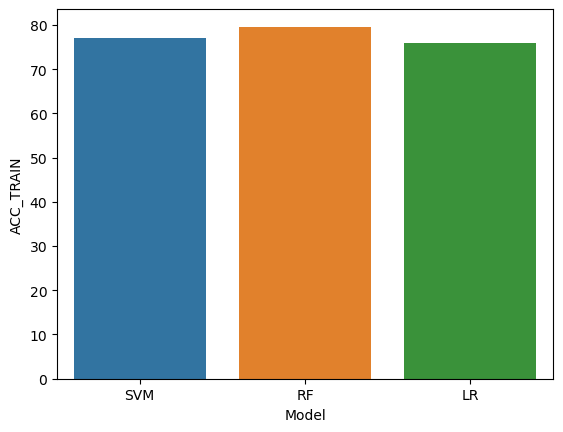

In [62]:
sns.barplot(FINAL_DATA['Model'],FINAL_DATA['ACC_TRAIN'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='ACC_TEST'>

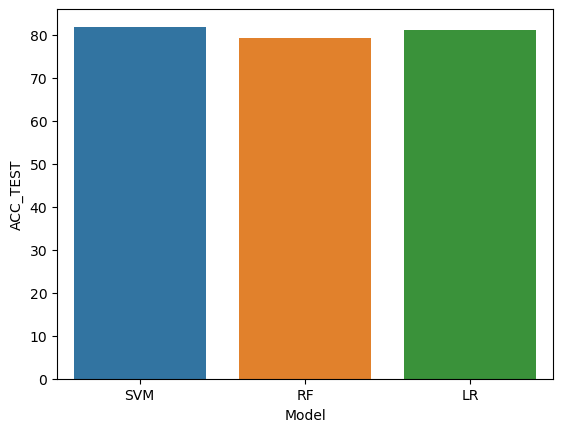

In [63]:
sns.barplot(FINAL_DATA['Model'],FINAL_DATA['ACC_TEST'])

In [ ]:
P=int(input())
G=int(input())
B=int(input())
S=int(input())
I=int(input())
BM=input()
D=input()
A=int(input())

In [ ]:
new_data=pd.DataFrame({
    'Pregnancies':P,
  	'Glucose': G,
    'BloodPressure':B,
    'SkinThickness':	S,
    'Insulin':	I,
    'BMI':	BM,
    'DiabetesPedigreeFunction':	D,
    'Age':	A
},index=[0])

In [ ]:
S=SVM1.predict(new_data)
RF=rf.predict(new_data)
LR1=model.predict(new_data)


In [ ]:
if S[0] == 0:
    print('Non-diabetic')
else:
    print('Diabetic')
    
    
 

In [ ]:
if RF[0] == 0:
    print('Non-diabetic')
else:
    print('Diabetic')   

In [ ]:
if LR1[0] == 0:
    print('Non-diabetic')
else:
    print('Diabetic')   